In [242]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import statsmodels.api as sm
import folium 
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import LabelEncoder
import ast

In [243]:
from sklearn.feature_selection import mutual_info_regression
from folium.plugins import FastMarkerCluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [244]:
train_df = pd.read_csv('Train.csv')
test_df = pd.read_csv('Test.csv')
extradata_df = pd.read_csv('extra_data.csv')

In [245]:
train_df.head()


,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [246]:
train_df.shape

(373, 12)

In [247]:
train_df.dtypes

MERCHANT_CATEGORIZED_AT                   object
MERCHANT_NAME                             object
MERCHANT_CATEGORIZED_AS                   object
PURCHASE_VALUE                             int64
PURCHASED_AT                              object
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY       bool
USER_AGE                                 float64
USER_GENDER                               object
USER_HOUSEHOLD                             int64
USER_INCOME                                int64
USER_ID                                   object
Transaction_ID                            object
dtype: object

In [248]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                373 non-null    object 
 1   MERCHANT_NAME                          373 non-null    object 
 2   MERCHANT_CATEGORIZED_AS                373 non-null    object 
 3   PURCHASE_VALUE                         373 non-null    int64  
 4   PURCHASED_AT                           373 non-null    object 
 5   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  373 non-null    bool   
 6   USER_AGE                               61 non-null     float64
 7   USER_GENDER                            367 non-null    object 
 8   USER_HOUSEHOLD                         373 non-null    int64  
 9   USER_INCOME                            373 non-null    int64  
 10  USER_ID                                373 non-null    object 
 11  Transa

In [249]:
test_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-06-01 10:25:16.7131+00,KCB PAYBILL AC,150000,2022-05-05 08:29:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx
1,2022-03-16 13:05:51.851102+00,IPAY LTD,7394,2019-10-05 16:02:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,ID_01db594f
2,2022-03-10 18:25:42.112294+00,JOHN NJIRU GAKUNJU,200,2021-11-25 09:56:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_07pm99no
3,2022-04-12 15:59:14.139347+00,UONSDA CHURCH OFFERING-MAIN,50,2022-04-11 14:48:00+00,False,NaN,Male,2,10000,ID_GR569FUO,ID_09jryhkd
4,2022-05-04 10:24:26.709045+00,M-SHWARI LOCK SAVINGS,10000,2022-05-04 13:59:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c


In [250]:
test_df.shape

(558, 11)

In [251]:
test_df.dtypes

MERCHANT_CATEGORIZED_AT                   object
MERCHANT_NAME                             object
PURCHASE_VALUE                             int64
PURCHASED_AT                              object
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY       bool
USER_AGE                                 float64
USER_GENDER                               object
USER_HOUSEHOLD                             int64
USER_INCOME                                int64
USER_ID                                   object
Transaction_ID                            object
dtype: object

In [252]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   MERCHANT_CATEGORIZED_AT                558 non-null    object 
 1   MERCHANT_NAME                          558 non-null    object 
 2   PURCHASE_VALUE                         558 non-null    int64  
 3   PURCHASED_AT                           558 non-null    object 
 4   IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY  558 non-null    bool   
 5   USER_AGE                               85 non-null     float64
 6   USER_GENDER                            553 non-null    object 
 7   USER_HOUSEHOLD                         558 non-null    int64  
 8   USER_INCOME                            558 non-null    int64  
 9   USER_ID                                558 non-null    object 
 10  Transaction_ID                         558 non-null    object 
dtypes: boo

In [253]:
extradata_df.head()

,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,NaN,ACCESS AFYA,NaN,1,2021-07-05 11:07:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_rgne8ij5
2,NaN,POA,NaN,1500,2021-06-21 19:40:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_4i2b28b6
3,NaN,POA,NaN,1500,2021-04-22 18:41:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_6dvi32yc
4,NaN,ACCESS AFYA,NaN,1,2021-07-29 13:03:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_sfk1yxbm


In [254]:
extradata_df.shape

(10000, 12)

In [358]:
train_df.index


RangeIndex(start=0, stop=373, step=1)

In [255]:
extradata_df.dtypes

MERCHANT_CATEGORIZED_AT                  float64
MERCHANT_NAME                             object
MERCHANT_CATEGORIZED_AS                  float64
PURCHASE_VALUE                             int64
PURCHASED_AT                              object
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY       bool
USER_AGE                                 float64
USER_GENDER                               object
USER_HOUSEHOLD                             int64
USER_INCOME                                int64
USER_ID                                   object
Transaction_ID                            object
dtype: object

In [256]:
conc_df = pd.concat([train_df,extradata_df], axis=0)


In [257]:

s = pd.get_dummies(conc_df['MERCHANT_CATEGORIZED_AS'], prefix_sep='', drop_first=False)
conc_df = s.join(conc_df)
conc_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,False,False,False,False,False,False,False,False,False,False,True,False,False,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
0,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
0,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,False,False,False,False,False,False,False,False,False,False,False,False,True,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07


In [258]:
conc_df.head(5)

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,False,False,False,False,False,False,False,False,False,False,True,False,False,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
0,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
0,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000,ID_R4T8Q46J,ID_v13grrw3
1,False,False,False,False,False,False,False,False,False,False,False,False,True,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07


In [259]:
conc_df.nunique()

Bills & Fees                                 2
Data & WiFi                                  2
Education                                    2
Emergency fund                               2
Family & Friends                             2
Going out                                    2
Groceries                                    2
Health                                       2
Loan Repayment                               2
Miscellaneous                                2
Rent / Mortgage                              2
Shopping                                     2
Transport & Fuel                             2
MERCHANT_CATEGORIZED_AT                     58
MERCHANT_NAME                             2908
MERCHANT_CATEGORIZED_AS                     13
PURCHASE_VALUE                            1571
PURCHASED_AT                             10259
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        2
USER_AGE                                     6
USER_GENDER                                  2
USER_HOUSEHOL

In [260]:
conc_df.nunique()
    

Bills & Fees                                 2
Data & WiFi                                  2
Education                                    2
Emergency fund                               2
Family & Friends                             2
Going out                                    2
Groceries                                    2
Health                                       2
Loan Repayment                               2
Miscellaneous                                2
Rent / Mortgage                              2
Shopping                                     2
Transport & Fuel                             2
MERCHANT_CATEGORIZED_AT                     58
MERCHANT_NAME                             2908
MERCHANT_CATEGORIZED_AS                     13
PURCHASE_VALUE                            1571
PURCHASED_AT                             10259
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        2
USER_AGE                                     6
USER_GENDER                                  2
USER_HOUSEHOL

In [261]:
missing_perc = conc_df.isna().sum()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

Bills & Fees                                 0
Data & WiFi                                  0
Education                                    0
Emergency fund                               0
Family & Friends                             0
Going out                                    0
Groceries                                    0
Health                                       0
Loan Repayment                               0
Miscellaneous                                0
Rent / Mortgage                              0
Shopping                                     0
Transport & Fuel                             0
MERCHANT_CATEGORIZED_AT                  10373
MERCHANT_NAME                                0
MERCHANT_CATEGORIZED_AS                  10373
PURCHASE_VALUE                               0
PURCHASED_AT                                 0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY        0
USER_AGE                                  9484
USER_GENDER                                 64
USER_HOUSEHOL

In [262]:

conc_df = conc_df.drop(['USER_ID', 'Transaction_ID'], axis=1)
conc_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_CATEGORIZED_AT,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME
0,False,False,False,False,False,False,False,False,False,False,True,False,False,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000
0,False,False,False,False,False,False,False,False,False,False,True,False,False,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000
0,False,False,False,False,False,False,False,False,False,False,False,False,False,2022-05-04 10:25:50.588042+00,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000
0,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,NaN,1,10000
1,False,False,False,False,False,False,False,False,False,False,False,False,True,2021-10-25 16:18:38.586837+00,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000


In [263]:
conc_df.columns

Index(['Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund',
       'Family & Friends', 'Going out', 'Groceries', 'Health',
       'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping',
       'Transport & Fuel', 'MERCHANT_CATEGORIZED_AT', 'MERCHANT_NAME',
       'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE', 'PURCHASED_AT',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME'],
      dtype='object')

In [264]:
missing_perc = conc_df.isna().sum()/conc_df.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

Bills & Fees                              0.000000
Data & WiFi                               0.000000
Education                                 0.000000
Emergency fund                            0.000000
Family & Friends                          0.000000
Going out                                 0.000000
Groceries                                 0.000000
Health                                    0.000000
Loan Repayment                            0.000000
Miscellaneous                             0.000000
Rent / Mortgage                           0.000000
Shopping                                  0.000000
Transport & Fuel                          0.000000
MERCHANT_CATEGORIZED_AT                  93.290764
MERCHANT_NAME                             0.000000
MERCHANT_CATEGORIZED_AS                  93.290764
PURCHASE_VALUE                            0.000000
PURCHASED_AT                              0.000000
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY     0.000000
USER_AGE                       

In [265]:
missing_perc = test_df.isna().sum()/test_df.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

MERCHANT_CATEGORIZED_AT                   0.000000
MERCHANT_NAME                             0.000000
PURCHASE_VALUE                            0.000000
PURCHASED_AT                              0.000000
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY     0.000000
USER_AGE                                 84.767025
USER_GENDER                               0.896057
USER_HOUSEHOLD                            0.000000
USER_INCOME                               0.000000
USER_ID                                   0.000000
Transaction_ID                            0.000000
dtype: float64

In [266]:

conc_df['USER_GENDER'].fillna(conc_df['USER_GENDER'].mode()[0], inplace=True)

test_df['USER_GENDER'].fillna(test_df['USER_GENDER'].mode()[0], inplace=True)


In [267]:

conc_df['MERCHANT_CATEGORIZED_AT'] = pd.to_datetime(conc_df['MERCHANT_CATEGORIZED_AT'])

In [268]:

conc_df['Day_MERCHANT'] = conc_df['MERCHANT_CATEGORIZED_AT'].dt.day
conc_df['Month_MERCHANT'] = conc_df['MERCHANT_CATEGORIZED_AT'].dt.month_name()
conc_df['Year_MERCHANT'] = conc_df['MERCHANT_CATEGORIZED_AT'].dt.year
conc_df['Hour_MERCHANT'] = conc_df['MERCHANT_CATEGORIZED_AT'].dt.hour


conc_df = conc_df.drop(['MERCHANT_CATEGORIZED_AT'], axis=1)




In [269]:
conc_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT
0,False,False,False,False,False,False,False,False,False,False,True,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,4.0,May,2022.0,10.0
0,False,False,False,False,False,False,False,False,False,False,True,False,False,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,Male,1,10000,NaN,NaN,NaN,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,4.0,May,2022.0,10.0
0,False,False,False,False,False,False,False,False,False,False,False,False,False,MARK NYABAYO,NaN,20,2021-03-22 12:37:00+00,False,NaN,Male,1,10000,NaN,NaN,NaN,NaN
1,False,False,False,False,False,False,False,False,False,False,False,False,True,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,25.0,October,2021.0,16.0


In [270]:
test_df['MERCHANT_CATEGORIZED_AT'] = pd.to_datetime(test_df['MERCHANT_CATEGORIZED_AT'])

In [271]:
test_df['Day_MERCHANT'] = pd.to_datetime(test_df['MERCHANT_CATEGORIZED_AT']).dt.day
test_df['Month_MERCHANT'] = test_df['MERCHANT_CATEGORIZED_AT'].dt.month_name()
test_df['Year_MERCHANT'] = test_df['MERCHANT_CATEGORIZED_AT'].dt.year
test_df['Hour_MERCHANT'] = test_df['MERCHANT_CATEGORIZED_AT'].dt.hour

test_df = test_df.drop(['MERCHANT_CATEGORIZED_AT'], axis=1)
test_df.head()

,MERCHANT_NAME,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT
0,KCB PAYBILL AC,150000,2022-05-05 08:29:00+00,True,NaN,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx,1,June,2022,10
1,IPAY LTD,7394,2019-10-05 16:02:00+00,False,NaN,Female,1,10000,ID_40L9OTIM,ID_01db594f,16,March,2022,13
2,JOHN NJIRU GAKUNJU,200,2021-11-25 09:56:00+00,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_07pm99no,10,March,2022,18
3,UONSDA CHURCH OFFERING-MAIN,50,2022-04-11 14:48:00+00,False,NaN,Male,2,10000,ID_GR569FUO,ID_09jryhkd,12,April,2022,15
4,M-SHWARI LOCK SAVINGS,10000,2022-05-04 13:59:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c,4,May,2022,10


In [272]:
conc_df['PURCHASED_AT'] = pd.to_datetime(conc_df['PURCHASED_AT'])

In [273]:
conc_df['Day_PURCHASED'] = pd.to_datetime(conc_df['PURCHASED_AT']).dt.day
conc_df['Month_PURCHASED'] = conc_df['PURCHASED_AT'].dt.month_name()
conc_df['Year_PURCHASED'] = conc_df['PURCHASED_AT'].dt.year
conc_df['Hour_PURCHASED'] = conc_df['PURCHASED_AT'].dt.hour


conc_df = conc_df.drop(['PURCHASED_AT'], axis=1)
conc_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,False,False,False,False,False,False,False,False,False,False,True,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,NaN,Male,3,10000,4.0,May,2022.0,10.0,4,May,2022,13
0,False,False,False,False,False,False,False,False,False,False,True,False,False,MARK NYABAYO,NaN,20,False,NaN,Male,1,10000,NaN,NaN,NaN,NaN,22,March,2021,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,NaN,Male,3,10000,4.0,May,2022.0,10.0,4,May,2022,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,MARK NYABAYO,NaN,20,False,NaN,Male,1,10000,NaN,NaN,NaN,NaN,22,March,2021,12
1,False,False,False,False,False,False,False,False,False,False,False,False,True,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000,25.0,October,2021.0,16.0,24,October,2021,14


In [274]:
test_df['PURCHASED_AT'] = pd.to_datetime(test_df['PURCHASED_AT'])

In [275]:

test_df['Day_PURCHASED'] = pd.to_datetime(test_df['PURCHASED_AT']).dt.day
test_df['Month_PURCHASED'] = test_df['PURCHASED_AT'].dt.month_name()
test_df['Year_PURCHASED'] = test_df['PURCHASED_AT'].dt.year
test_df['Hour_PURCHASED'] = test_df['PURCHASED_AT'].dt.hour

test_df = test_df.drop(['PURCHASED_AT'], axis=1)
test_df.head()

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,KCB PAYBILL AC,150000,True,NaN,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx,1,June,2022,10,5,May,2022,8
1,IPAY LTD,7394,False,NaN,Female,1,10000,ID_40L9OTIM,ID_01db594f,16,March,2022,13,5,October,2019,16
2,JOHN NJIRU GAKUNJU,200,False,NaN,Female,1,85000,ID_1I8XYBWK,ID_07pm99no,10,March,2022,18,25,November,2021,9
3,UONSDA CHURCH OFFERING-MAIN,50,False,NaN,Male,2,10000,ID_GR569FUO,ID_09jryhkd,12,April,2022,15,11,April,2022,14
4,M-SHWARI LOCK SAVINGS,10000,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c,4,May,2022,10,4,May,2022,13


In [276]:
conc_df['MERCHANT_CATEGORIZED_AS'].fillna(conc_df['MERCHANT_CATEGORIZED_AS'].mode()[0], inplace=True)

In [277]:
conc_df['USER_AGE'].fillna(conc_df['USER_AGE'].mode()[0], inplace=True)


In [278]:
test_df['USER_AGE'].fillna(test_df['USER_AGE'].mode()[0], inplace=True)


In [279]:
conc_df['Day_MERCHANT'].fillna(conc_df['Day_MERCHANT'].mean(),inplace=True)

In [280]:
test_df.head()

,MERCHANT_NAME,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,KCB PAYBILL AC,150000,True,25.0,Male,5,150000,ID_O8P8YS18,ID_00x9h2yx,1,June,2022,10,5,May,2022,8
1,IPAY LTD,7394,False,25.0,Female,1,10000,ID_40L9OTIM,ID_01db594f,16,March,2022,13,5,October,2019,16
2,JOHN NJIRU GAKUNJU,200,False,25.0,Female,1,85000,ID_1I8XYBWK,ID_07pm99no,10,March,2022,18,25,November,2021,9
3,UONSDA CHURCH OFFERING-MAIN,50,False,25.0,Male,2,10000,ID_GR569FUO,ID_09jryhkd,12,April,2022,15,11,April,2022,14
4,M-SHWARI LOCK SAVINGS,10000,False,25.0,Male,3,10000,ID_ZX4DCF4K,ID_0ccv924c,4,May,2022,10,4,May,2022,13


In [281]:

month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
conc_df['Month_MERCHANT'] = conc_df['Month_MERCHANT'].map(month_dict)


median_value = conc_df['Month_MERCHANT'].median()
conc_df['Month_MERCHANT'].fillna(median_value, inplace=True)


In [282]:

month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
test_df['Month_MERCHANT'] = test_df['Month_MERCHANT'].map(month_dict)


median_value = test_df['Month_MERCHANT'].median()
test_df['Month_MERCHANT'].fillna(median_value, inplace=True)

In [283]:
conc_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,False,False,False,False,False,False,False,False,False,False,True,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000,4.00000,5.0,2022.0,10.0,4,May,2022,13
0,False,False,False,False,False,False,False,False,False,False,True,False,False,MARK NYABAYO,Bills & Fees,20,False,25.0,Male,1,10000,13.02681,5.0,NaN,NaN,22,March,2021,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000,4.00000,5.0,2022.0,10.0,4,May,2022,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,MARK NYABAYO,Bills & Fees,20,False,25.0,Male,1,10000,13.02681,5.0,NaN,NaN,22,March,2021,12
1,False,False,False,False,False,False,False,False,False,False,False,False,True,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000,25.00000,10.0,2021.0,16.0,24,October,2021,14


In [284]:
conc_df['Year_MERCHANT'].fillna(conc_df['Year_MERCHANT'].mean(), inplace=True)

In [285]:
test_df['Year_MERCHANT'].fillna(test_df['Year_MERCHANT'].mean(), inplace=True)

In [286]:
conc_df['Hour_MERCHANT'].fillna(conc_df['Hour_MERCHANT'].mean(), inplace=True)

In [287]:
test_df['Hour_MERCHANT'].fillna(test_df['Hour_MERCHANT'].mean(), inplace=True)

In [288]:
missing_perc = test_df.isna().sum()/test_df.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

MERCHANT_NAME                            0.0
PURCHASE_VALUE                           0.0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0.0
USER_AGE                                 0.0
USER_GENDER                              0.0
USER_HOUSEHOLD                           0.0
USER_INCOME                              0.0
USER_ID                                  0.0
Transaction_ID                           0.0
Day_MERCHANT                             0.0
Month_MERCHANT                           0.0
Year_MERCHANT                            0.0
Hour_MERCHANT                            0.0
Day_PURCHASED                            0.0
Month_PURCHASED                          0.0
Year_PURCHASED                           0.0
Hour_PURCHASED                           0.0
dtype: float64

In [289]:
missing_perc = conc_df.isna().sum()/conc_df.shape[0]*100
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
missing_perc

Bills & Fees                             0.0
Data & WiFi                              0.0
Education                                0.0
Emergency fund                           0.0
Family & Friends                         0.0
Going out                                0.0
Groceries                                0.0
Health                                   0.0
Loan Repayment                           0.0
Miscellaneous                            0.0
Rent / Mortgage                          0.0
Shopping                                 0.0
Transport & Fuel                         0.0
MERCHANT_NAME                            0.0
MERCHANT_CATEGORIZED_AS                  0.0
PURCHASE_VALUE                           0.0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0.0
USER_AGE                                 0.0
USER_GENDER                              0.0
USER_HOUSEHOLD                           0.0
USER_INCOME                              0.0
Day_MERCHANT                             0.0
Month_MERC

In [290]:
conc_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,False,False,False,False,False,False,False,False,False,False,True,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000,4.00000,5.0,2022.000000,10.000000,4,May,2022,13
0,False,False,False,False,False,False,False,False,False,False,True,False,False,MARK NYABAYO,Bills & Fees,20,False,25.0,Male,1,10000,13.02681,5.0,2021.715818,12.292225,22,March,2021,12
0,False,False,False,False,False,False,False,False,False,False,False,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000,4.00000,5.0,2022.000000,10.000000,4,May,2022,13
0,False,False,False,False,False,False,False,False,False,False,False,False,False,MARK NYABAYO,Bills & Fees,20,False,25.0,Male,1,10000,13.02681,5.0,2021.715818,12.292225,22,March,2021,12
1,False,False,False,False,False,False,False,False,False,False,False,False,True,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000,25.00000,10.0,2021.000000,16.000000,24,October,2021,14


In [291]:
conc_df.shape

(11119, 29)

In [292]:
test_df.isna().sum()

MERCHANT_NAME                            0
PURCHASE_VALUE                           0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
USER_ID                                  0
Transaction_ID                           0
Day_MERCHANT                             0
Month_MERCHANT                           0
Year_MERCHANT                            0
Hour_MERCHANT                            0
Day_PURCHASED                            0
Month_PURCHASED                          0
Year_PURCHASED                           0
Hour_PURCHASED                           0
dtype: int64

In [293]:
conc_df.isna().sum()

Bills & Fees                             0
Data & WiFi                              0
Education                                0
Emergency fund                           0
Family & Friends                         0
Going out                                0
Groceries                                0
Health                                   0
Loan Repayment                           0
Miscellaneous                            0
Rent / Mortgage                          0
Shopping                                 0
Transport & Fuel                         0
MERCHANT_NAME                            0
MERCHANT_CATEGORIZED_AS                  0
PURCHASE_VALUE                           0
IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY    0
USER_AGE                                 0
USER_GENDER                              0
USER_HOUSEHOLD                           0
USER_INCOME                              0
Day_MERCHANT                             0
Month_MERCHANT                           0
Year_MERCHA

In [294]:
conc_df.duplicated().sum()

56

In [295]:
test_df.duplicated().sum()

0

In [296]:
conc_df.drop_duplicates(inplace=True)

In [297]:
test_df.drop_duplicates(inplace=True)

In [298]:
conc_df.duplicated().sum()

0

In [299]:
test_df.duplicated().sum()

0

In [300]:
conc_df.to_csv('Smart_Money_df.csv', index=False)

In [301]:
smart_money_df = pd.read_csv('Smart_Money_df.csv')

In [302]:
smart_money_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,False,False,False,False,False,False,False,False,False,False,True,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000,4.00000,5.0,2022.000000,10.000000,4,May,2022,13
1,False,False,False,False,False,False,False,False,False,False,True,False,False,MARK NYABAYO,Bills & Fees,20,False,25.0,Male,1,10000,13.02681,5.0,2021.715818,12.292225,22,March,2021,12
2,False,False,False,False,False,False,False,False,False,False,False,False,False,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,False,25.0,Male,3,10000,4.00000,5.0,2022.000000,10.000000,4,May,2022,13
3,False,False,False,False,False,False,False,False,False,False,False,False,False,MARK NYABAYO,Bills & Fees,20,False,25.0,Male,1,10000,13.02681,5.0,2021.715818,12.292225,22,March,2021,12
4,False,False,False,False,False,False,False,False,False,False,False,False,True,PARK N GO,Transport & Fuel,100,False,25.0,Female,4,90000,25.00000,10.0,2021.000000,16.000000,24,October,2021,14


In [303]:
fg= smart_money_df['Hour_MERCHANT'].max()
fg

18.0

In [304]:
smart_money_df.shape

(11063, 29)

In [305]:
test_df.shape

(558, 17)

In [306]:
test_df.columns

Index(['MERCHANT_NAME', 'PURCHASE_VALUE',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID', 'Transaction_ID',
       'Day_MERCHANT', 'Month_MERCHANT', 'Year_MERCHANT', 'Hour_MERCHANT',
       'Day_PURCHASED', 'Month_PURCHASED', 'Year_PURCHASED', 'Hour_PURCHASED'],
      dtype='object')

In [307]:
smart_money_df.columns

Index(['Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund',
       'Family & Friends', 'Going out', 'Groceries', 'Health',
       'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping',
       'Transport & Fuel', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS',
       'PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE',
       'USER_GENDER', 'USER_HOUSEHOLD', 'USER_INCOME', 'Day_MERCHANT',
       'Month_MERCHANT', 'Year_MERCHANT', 'Hour_MERCHANT', 'Day_PURCHASED',
       'Month_PURCHASED', 'Year_PURCHASED', 'Hour_PURCHASED'],
      dtype='object')

In [308]:
column_data_types = smart_money_df.dtypes

# Separate columns into categorical and numerical
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'USER_GENDER', 'Month_PURCHASED']

Numerical Columns:
['Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund', 'Family & Friends', 'Going out', 'Groceries', 'Health', 'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping', 'Transport & Fuel', 'PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME', 'Day_MERCHANT', 'Month_MERCHANT', 'Year_MERCHANT', 'Hour_MERCHANT', 'Day_PURCHASED', 'Year_PURCHASED', 'Hour_PURCHASED']


In [309]:
column_data_types = test_df.dtypes

# Separate columns into categorical and numerical
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()

print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['MERCHANT_NAME', 'USER_GENDER', 'USER_ID', 'Transaction_ID', 'Month_PURCHASED']

Numerical Columns:
['PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_HOUSEHOLD', 'USER_INCOME', 'Day_MERCHANT', 'Month_MERCHANT', 'Year_MERCHANT', 'Hour_MERCHANT', 'Day_PURCHASED', 'Year_PURCHASED', 'Hour_PURCHASED']


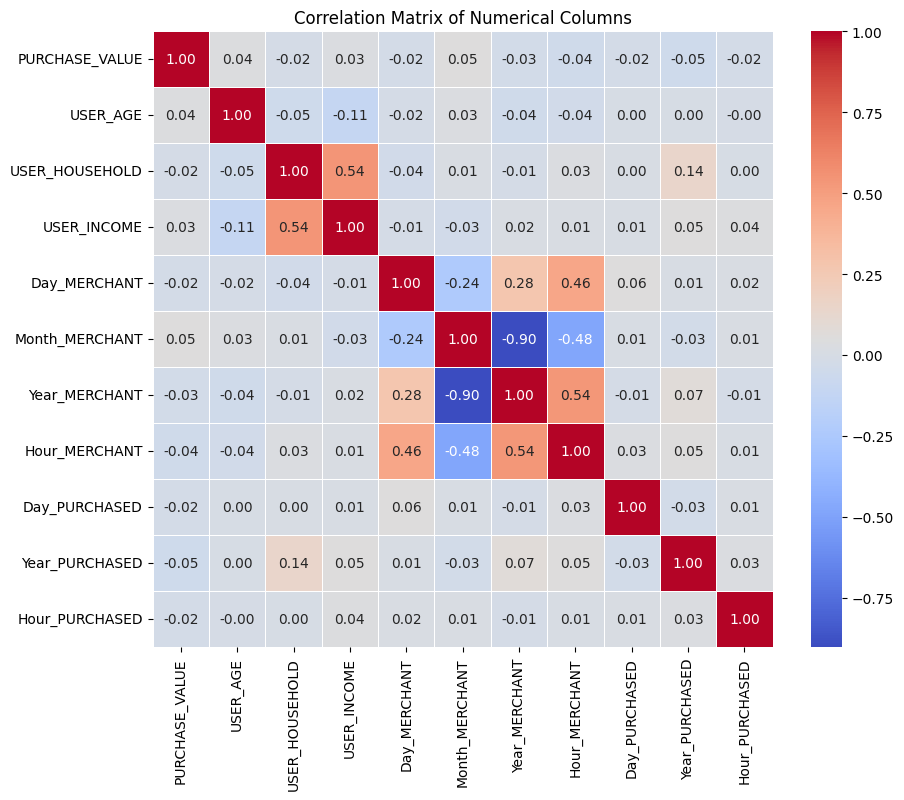

In [549]:
numerical_columns = smart_money_df.select_dtypes(include=[np.number])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

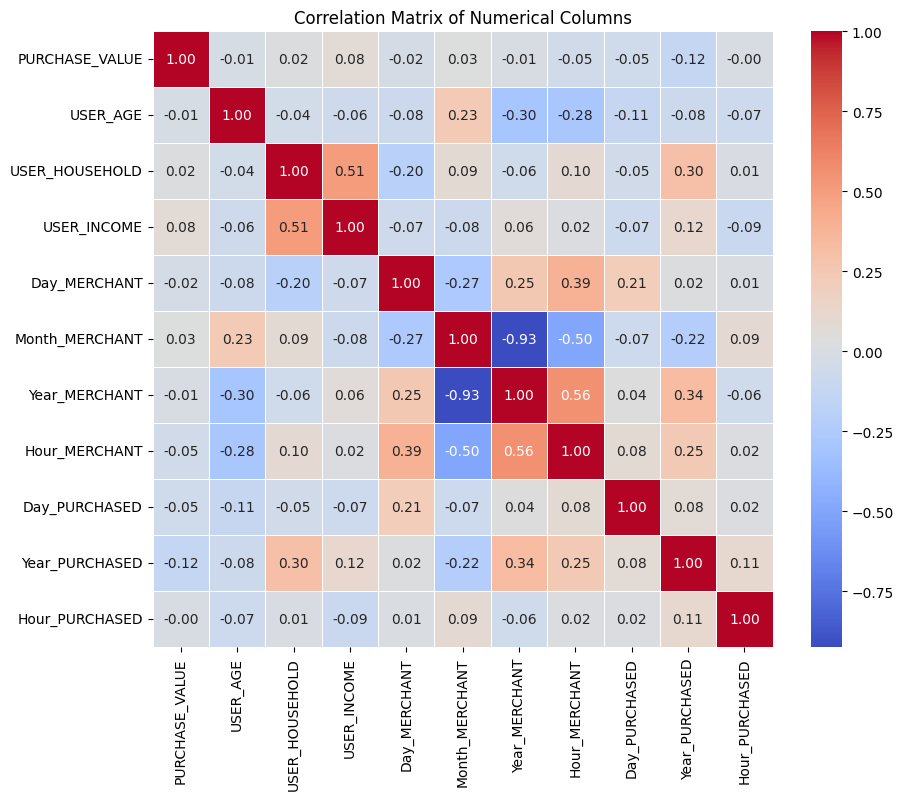

In [550]:
numerical_columns = test_df.select_dtypes(include=[np.number])

correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

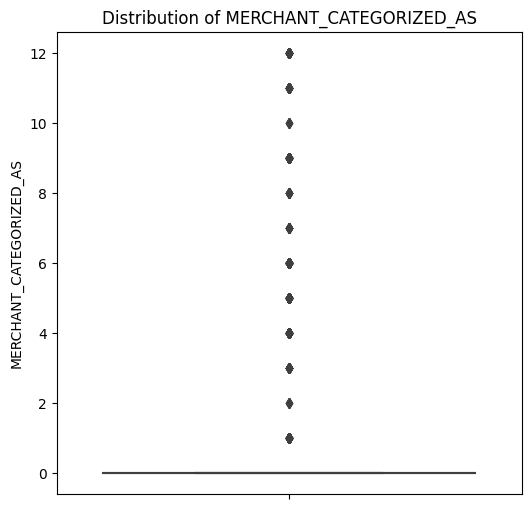

In [310]:
label_encoder = LabelEncoder()
smart_money_df['MERCHANT_CATEGORIZED_AS'] = label_encoder.fit_transform(smart_money_df['MERCHANT_CATEGORIZED_AS'])

plt.figure(figsize=(6, 6))
sns.boxplot(y=smart_money_df['MERCHANT_CATEGORIZED_AS'])
plt.title("Distribution of MERCHANT_CATEGORIZED_AS")
plt.show()

In [552]:
Q1 =smart_money_df['MERCHANT_CATEGORIZED_AS'].quantile(0.25)
Q3 = smart_money_df['MERCHANT_CATEGORIZED_AS'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 0.0


Text(0, 0.5, 'MERCHANT_CATEGORIZED_AS')

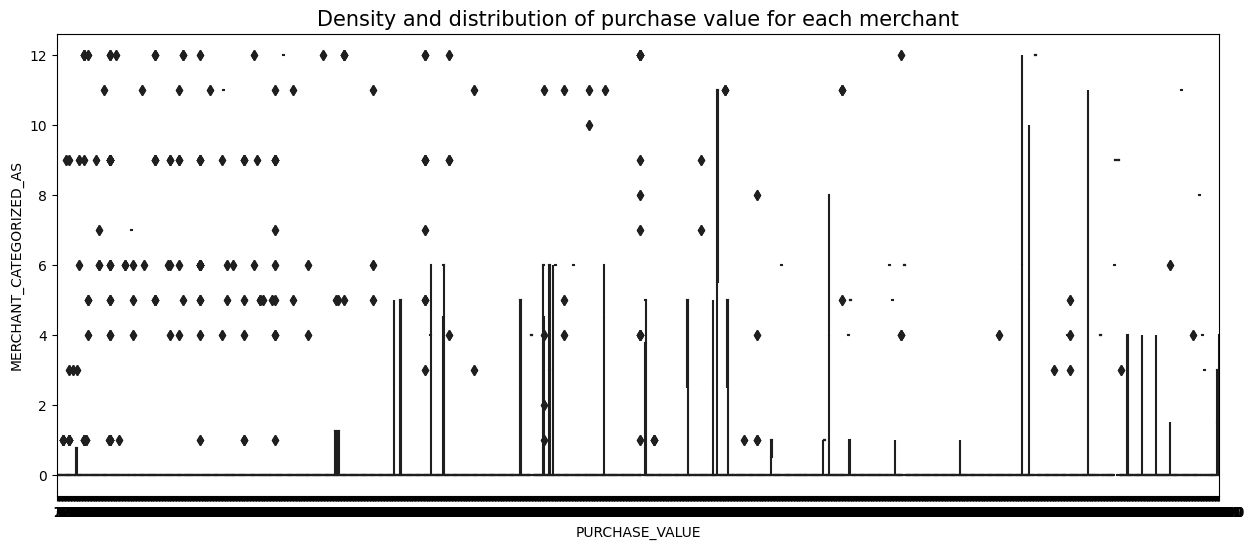

In [553]:
plt.figure(figsize=(15,6))
sns.boxplot(data=smart_money_df, x='PURCHASE_VALUE', y='MERCHANT_CATEGORIZED_AS', palette='GnBu_d')
plt.title('Density and distribution of purchase value for each merchant', fontsize=15)
plt.xlabel('PURCHASE_VALUE')
plt.ylabel("MERCHANT_CATEGORIZED_AS")

Text(0, 0.5, 'MERCHANT_CATEGORIZED_AS')

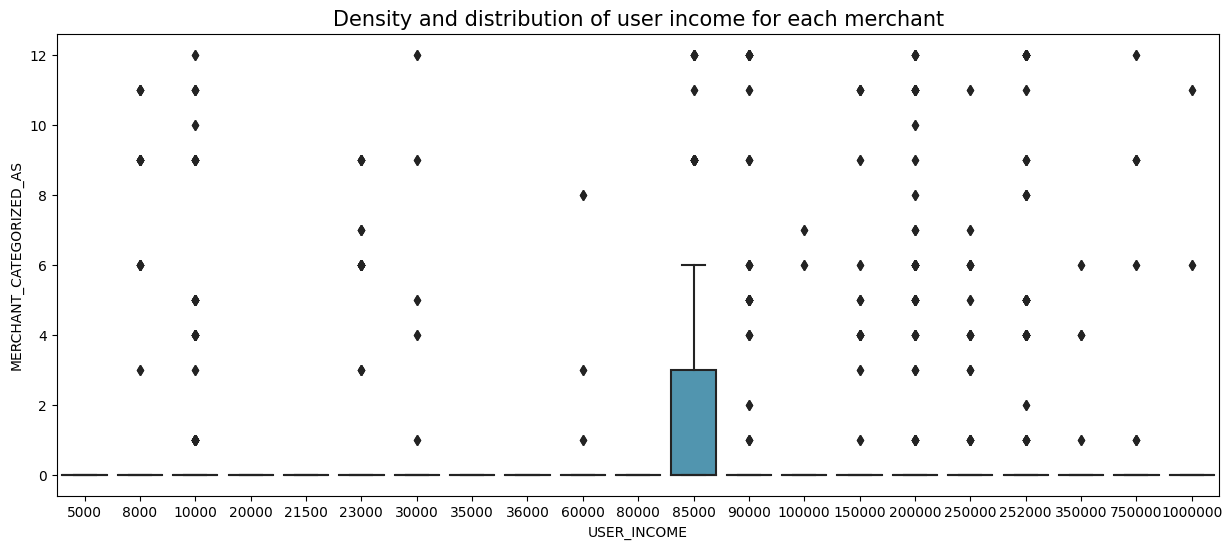

In [554]:
plt.figure(figsize=(15,6))
sns.boxplot(data=smart_money_df, x='USER_INCOME', y='MERCHANT_CATEGORIZED_AS', palette='GnBu_d')
plt.title('Density and distribution of user income for each merchant', fontsize=15)
plt.xlabel('USER_INCOME')
plt.ylabel("MERCHANT_CATEGORIZED_AS")

/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_5967/88077346.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(smart_money_df['MERCHANT_CATEGORIZED_AS'], kde=False)


Text(0.5, 1.0, 'Distribution of MERCHANT_CATEGORIZED_AS')

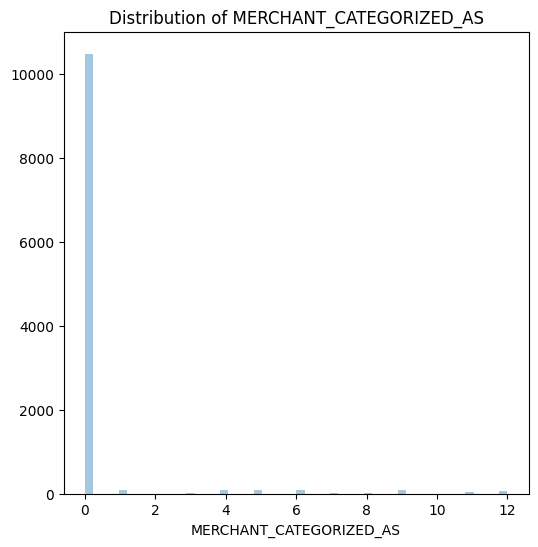

In [555]:
plt.figure(figsize=(6, 6))
sns.distplot(smart_money_df['MERCHANT_CATEGORIZED_AS'], kde=False)
plt.title('Distribution of MERCHANT_CATEGORIZED_AS')

Text(0.5, 1.0, 'Percentage in Each PURCHASE_VALUE')

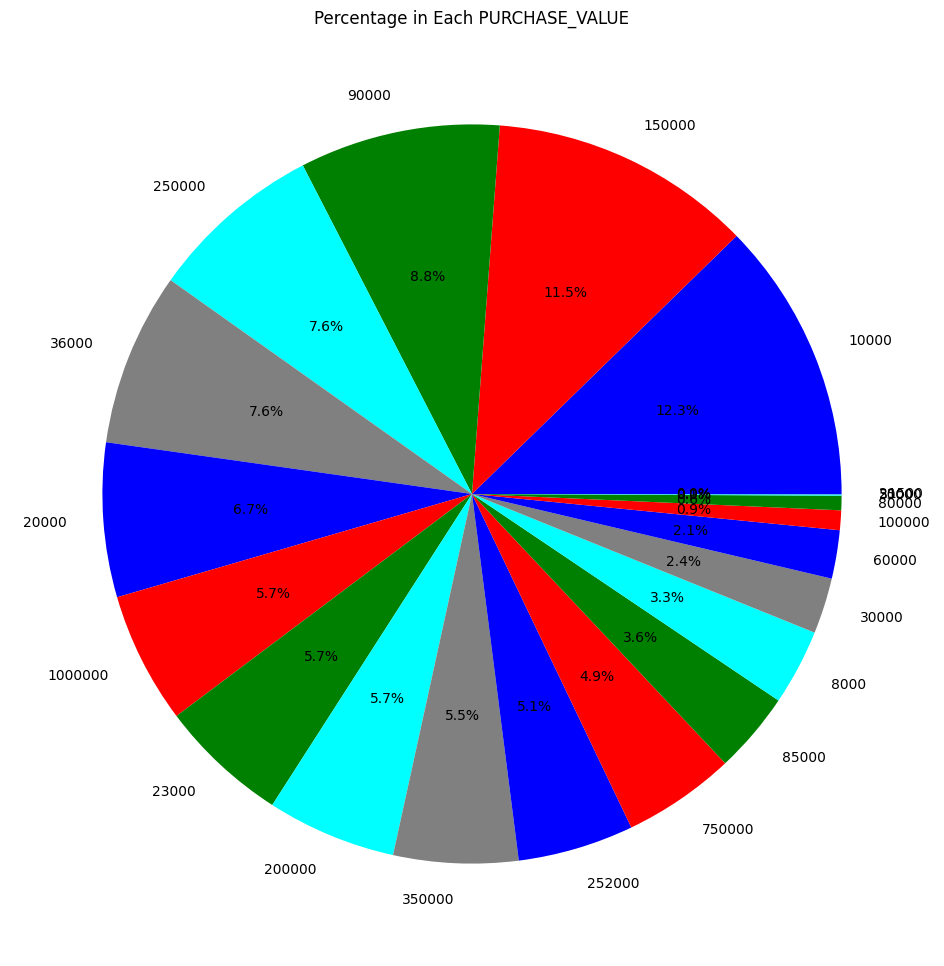

In [556]:
plt.figure(figsize=(15,12))
numbers = smart_money_df['USER_INCOME'].value_counts()
plt.pie(numbers.values, labels=numbers.index, colors=['b', 'r', 'g', 'cyan', 'gray'], autopct='%1.1f%%')
plt.title('Percentage in Each PURCHASE_VALUE')

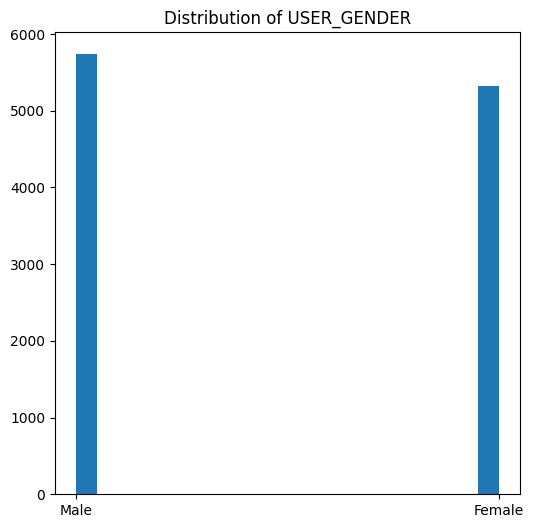

In [557]:
plt.figure(figsize=(6,6))
plt.hist(smart_money_df['USER_GENDER'], bins=20)
plt.title("Distribution of USER_GENDER")
plt.show()

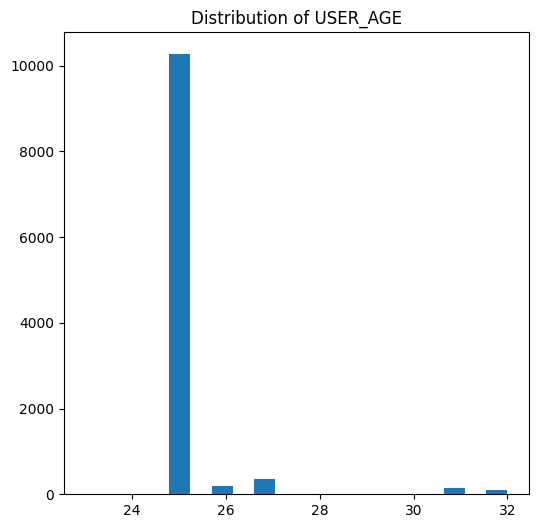

In [558]:
plt.figure(figsize=(6,6))
plt.hist(smart_money_df['USER_AGE'], bins=20)
plt.title("Distribution of USER_AGE")
plt.show()

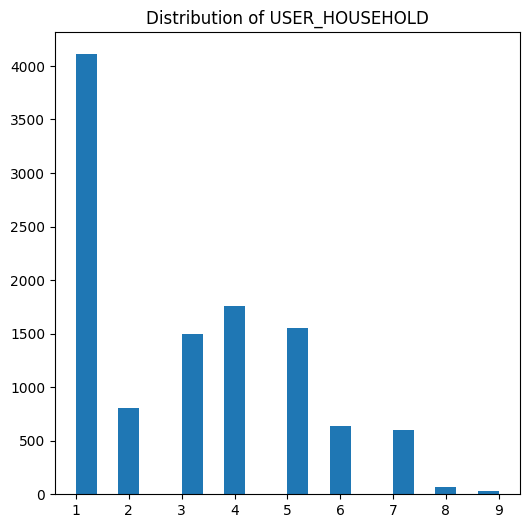

In [559]:
plt.figure(figsize=(6,6))
plt.hist(smart_money_df['USER_HOUSEHOLD'], bins=20)
plt.title("Distribution of USER_HOUSEHOLD")
plt.show()

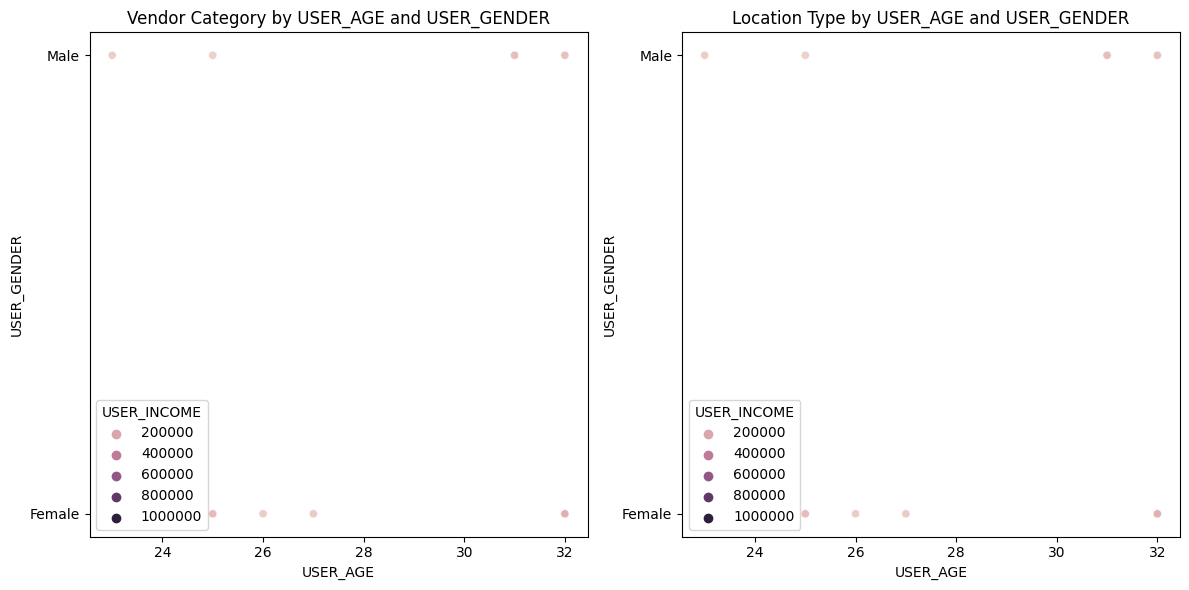

In [570]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x=smart_money_df['USER_AGE'], y=smart_money_df['USER_GENDER'], hue=smart_money_df['USER_INCOME'], ax=axs[0])
axs[0].set_title('Vendor Category by USER_AGE and USER_GENDER' )
axs[0].set_xlabel('USER_AGE')
axs[0].set_ylabel('USER_GENDER')
sns.scatterplot(x=smart_money_df['USER_AGE'], y=smart_money_df['USER_GENDER'], hue=smart_money_df['USER_INCOME'], ax=axs[1])
axs[1].set_title('Location Type by USER_AGE and USER_GENDER')
axs[1].set_xlabel('USER_AGE')
axs[1].set_ylabel('USER_GENDER')
plt.tight_layout()
plt.show()

In [311]:
smart_money_df['MERCHANT_CATEGORIZED_AS'] = np.log(smart_money_df['MERCHANT_CATEGORIZED_AS'])



/Users/damacm172_/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [312]:
print("Skewness:", smart_money_df['MERCHANT_CATEGORIZED_AS'].skew())
print("Kurtosis:", smart_money_df['MERCHANT_CATEGORIZED_AS'].kurt())

Skewness: nan
Kurtosis: nan


In [313]:
test_df.columns

Index(['MERCHANT_NAME', 'PURCHASE_VALUE',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID', 'Transaction_ID',
       'Day_MERCHANT', 'Month_MERCHANT', 'Year_MERCHANT', 'Hour_MERCHANT',
       'Day_PURCHASED', 'Month_PURCHASED', 'Year_PURCHASED', 'Hour_PURCHASED'],
      dtype='object')

In [314]:
smart_money_df.columns

Index(['Bills & Fees', 'Data & WiFi', 'Education', 'Emergency fund',
       'Family & Friends', 'Going out', 'Groceries', 'Health',
       'Loan Repayment', 'Miscellaneous', 'Rent / Mortgage', 'Shopping',
       'Transport & Fuel', 'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS',
       'PURCHASE_VALUE', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE',
       'USER_GENDER', 'USER_HOUSEHOLD', 'USER_INCOME', 'Day_MERCHANT',
       'Month_MERCHANT', 'Year_MERCHANT', 'Hour_MERCHANT', 'Day_PURCHASED',
       'Month_PURCHASED', 'Year_PURCHASED', 'Hour_PURCHASED'],
      dtype='object')

In [574]:

smart_money_df['MERCHANT_CATEGORIZED_AS'] = np.exp(smart_money_df['MERCHANT_CATEGORIZED_AS'])

<h1> FEATURE SELECTION <h1> 

In [ ]:
subset_df = smart_money_df[['MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE',
       'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
       'USER_HOUSEHOLD', 'USER_INCOME', 'Day_MERCHANT', 'Month_MERCHANT',
       'Year_MERCHANT', 'Hour_MERCHANT', 'Day_PURCHASED', 'Month_PURCHASED',
       'Year_PURCHASED', 'Hour_PURCHASED']]


# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = subset_df.columns
vif["VIF"] = [variance_inflation_factor(subset_df.values, i) for i in range(subset_df.shape[1])]

In [576]:
# # Replace inf values with a large finite value (e.g., 1e9) and fill NaN values with 0
subset_df.replace([np.inf, -np.inf], 1e9, inplace=True)
subset_df.fillna(0, inplace=True)

# Create a list of numeric column names
numeric_columns = subset_df.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the VIF for each numeric variable
vif = pd.DataFrame()
vif["Variable"] = numeric_columns
vif["VIF"] = [variance_inflation_factor(subset_df[numeric_columns].values, i) for i in range(len(numeric_columns))]

# Print the VIF values
print(vif)

/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_5967/354396663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.replace([np.inf, -np.inf], 1e9, inplace=True)
/var/folders/gw/0jvn6q5x6jj46f9t9ng1p8bw0000gn/T/ipykernel_5967/354396663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.fillna(0, inplace=True)


                   Variable           VIF
0   MERCHANT_CATEGORIZED_AS  1.118652e+00
1            PURCHASE_VALUE  1.077487e+00
2                  USER_AGE  6.388891e+02
3            USER_HOUSEHOLD  4.922276e+00
4               USER_INCOME  2.245060e+00
5              Day_MERCHANT  4.041753e+01
6            Month_MERCHANT  6.682630e+01
7             Year_MERCHANT  5.810405e+06
8             Hour_MERCHANT  2.330364e+02
9             Day_PURCHASED  4.116344e+00
10           Year_PURCHASED  5.816206e+06
11           Hour_PURCHASED  9.628173e+00


In [75]:
smart_money_df.shape

(11063, 29)

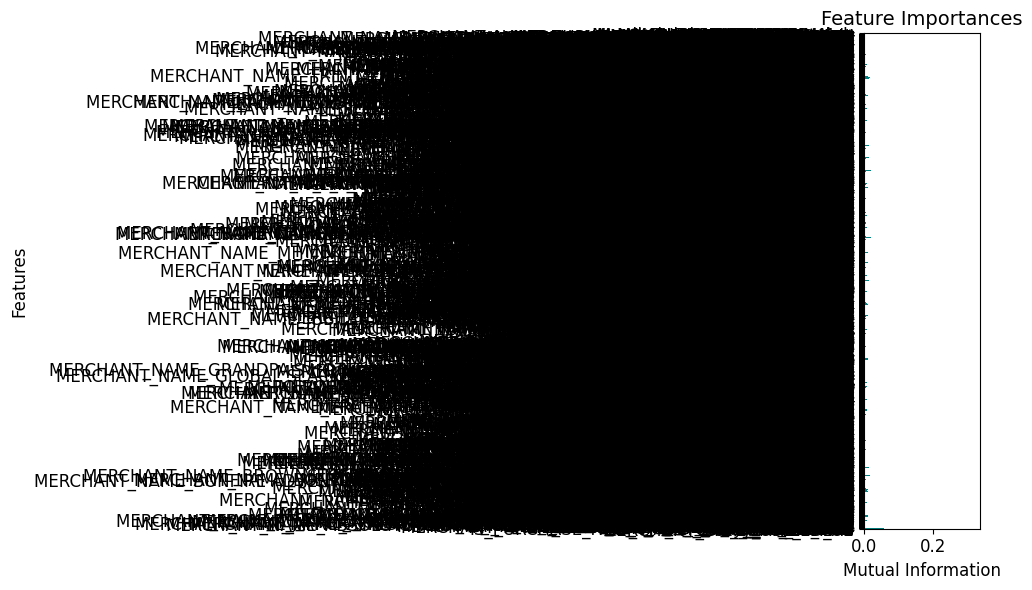

In [578]:
Y = smart_money_df['MERCHANT_CATEGORIZED_AS']
X = pd.get_dummies(smart_money_df[['MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE',
                                   'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
                                   'USER_HOUSEHOLD', 'USER_INCOME', 'Day_MERCHANT', 'Month_MERCHANT',
                                   'Year_MERCHANT', 'Hour_MERCHANT', 'Day_PURCHASED', 'Month_PURCHASED',
                                   'Year_PURCHASED', 'Hour_PURCHASED']])
# importances = mutual_info_regression(X, Y)
# feat_importances = pd.Series(importances, index=X.columns)
# plt.figure(figsize=(10, 6))
# feat_importances.plot(kind='barh', color='teal', fontsize=12)
# plt.xlabel('Mutual Information', fontsize=12)
# plt.ylabel('Features', fontsize=12)
# plt.title('Feature Importances', fontsize=14)
# plt.subplots_adjust(left=0.3)
# plt.tight_layout()
# plt.show()


import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression

# Replace infinity with NaN, then fill NaN with mean or median
X = X.replace([np.inf, -np.inf], np.nan)
X.fillna(X.mean(), inplace=True)  # You can use median or other strategies as well

# Scale the data using Min-Max scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate mutual information between X and Y
importances = mutual_info_regression(X_scaled, Y)
feat_importances = pd.Series(importances, index=X.columns)

# Plot the feature importances
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='barh', color='teal', fontsize=12)
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.show()


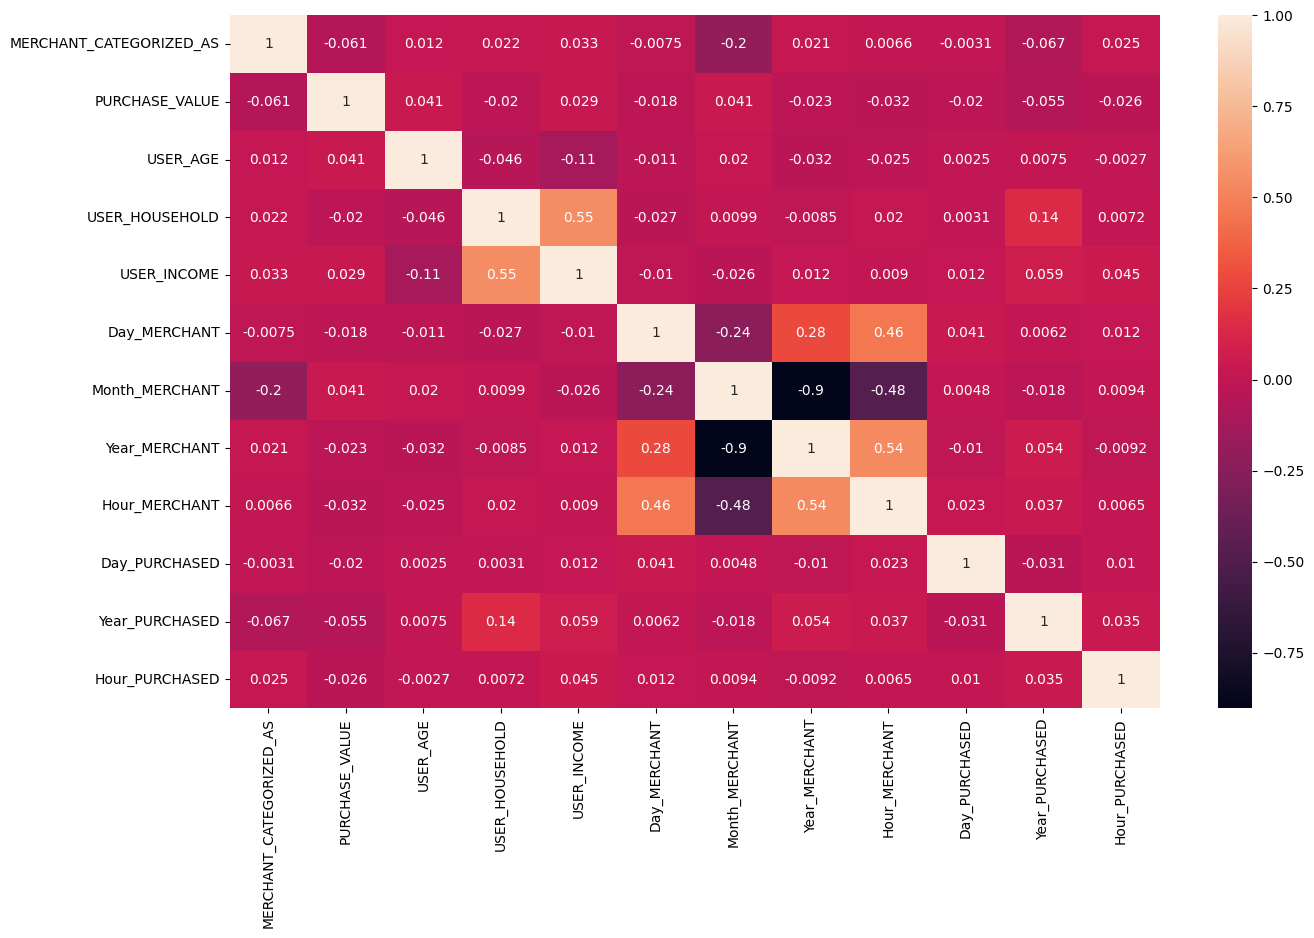

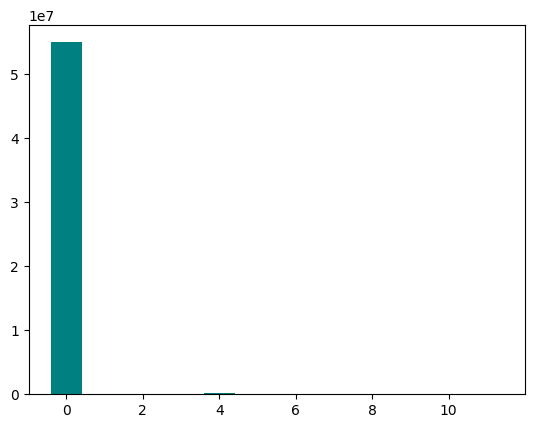

In [ ]:

selected_columns = ['MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE',
                                   'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE', 'USER_GENDER',
                                   'USER_HOUSEHOLD', 'USER_INCOME', 'Day_MERCHANT', 'Month_MERCHANT',
                                   'Year_MERCHANT', 'Hour_MERCHANT', 'Day_PURCHASED', 'Month_PURCHASED',
                                   'Year_PURCHASED', 'Hour_PURCHASED']
# Filter non-numeric columns and drop them from the subset_df DataFrame
non_numeric_columns = subset_df.select_dtypes(exclude='number').columns
subset_df = subset_df.drop(columns=non_numeric_columns)

# Now calculate correlations and mean absolute difference
cor = subset_df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(cor, annot=True)
plt.show()

# Calculate Mean Absolute Difference
mean_abs_diff = np.sum(np.abs(subset_df - np.mean(subset_df, axis=0)), axis=0) / subset_df.shape[0]
plt.bar(np.arange(subset_df.shape[1]), mean_abs_diff, color='teal')
plt.show()


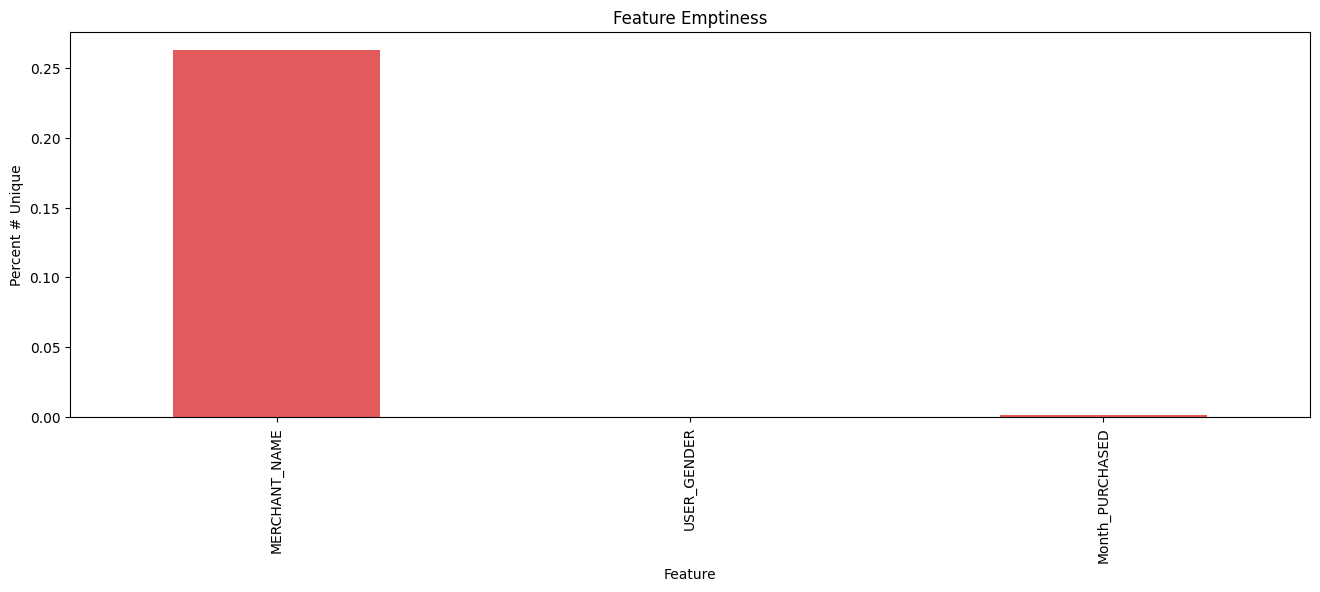

In [76]:

categories = smart_money_df.columns[smart_money_df.dtypes == 'object']
percentage_unique = smart_money_df[categories].nunique() / smart_money_df.shape[0]

ax = percentage_unique.plot(kind = 'bar', color='#E35A5C', figsize = (16, 5))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent # Unique')
ax.set_title('Feature Emptiness')
plt.show()

In [315]:
# Categorical Columns:['MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'USER_GENDER', 'Month_PURCHASED']

encodingRest = LabelEncoder()


smart_money_df["MERCHANT_NAME"] = encodingRest.fit_transform(smart_money_df["MERCHANT_NAME"])

smart_money_df["USER_GENDER"] = encodingRest.fit_transform(smart_money_df["USER_GENDER"])

smart_money_df["Month_PURCHASED"] = encodingRest.fit_transform(smart_money_df["Month_PURCHASED"])



In [316]:
# smart_money_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"] = encodingRest.fit_transform(smart_money_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"])

In [317]:
# ['MERCHANT_NAME', 'USER_GENDER', 'Month_PURCHASED']
encodingRest = LabelEncoder()


test_df["MERCHANT_NAME"] = encodingRest.fit_transform(test_df["MERCHANT_NAME"])

test_df["USER_GENDER"] = encodingRest.fit_transform(test_df["USER_GENDER"])

test_df["Month_PURCHASED"] = encodingRest.fit_transform(test_df["Month_PURCHASED"])

test_df["USER_ID"] = encodingRest.fit_transform(test_df["USER_ID"])

# test_df["Transaction_ID"] = encodingRest.fit_transform(test_df["Transaction_ID"])

In [ ]:
test_df.dtypes

In [319]:
smart_money_df.head()

,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent / Mortgage,Shopping,Transport & Fuel,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,Day_MERCHANT,Month_MERCHANT,Year_MERCHANT,Hour_MERCHANT,Day_PURCHASED,Month_PURCHASED,Year_PURCHASED,Hour_PURCHASED
0,False,False,False,False,False,False,False,False,False,False,True,False,False,2735,2.302585,1700,False,25.0,1,3,10000,4.00000,5.0,2022.000000,10.000000,4,8,2022,13
1,False,False,False,False,False,False,False,False,False,False,True,False,False,1556,-inf,20,False,25.0,1,1,10000,13.02681,5.0,2021.715818,12.292225,22,7,2021,12
2,False,False,False,False,False,False,False,False,False,False,False,False,False,2735,2.302585,1700,False,25.0,1,3,10000,4.00000,5.0,2022.000000,10.000000,4,8,2022,13
3,False,False,False,False,False,False,False,False,False,False,False,False,False,1556,-inf,20,False,25.0,1,1,10000,13.02681,5.0,2021.715818,12.292225,22,7,2021,12
4,False,False,False,False,False,False,False,False,False,False,False,False,True,1953,2.484907,100,False,25.0,0,4,90000,25.00000,10.0,2021.000000,16.000000,24,10,2021,14


In [ ]:
target = smart_money_df['Bills & Fees']
X = smart_money_df.drop(['MERCHANT_CATEGORIZED_AS', 'Data & WiFi','Education','Emergency fund','Family & Friends','Going out','Groceries','Health','Loan Repayment', 'Miscellaneous', 'Rent / Mortgage','Shopping','Transport & Fuel', 'Bills & Fees' ], axis=1)
xTest = test_df.drop(['Transaction_ID','USER_ID'], axis=1)

scale = StandardScaler()
scaledX = scale.fit_transform(X)

scaletest = StandardScaler()
scaledXtest = scaletest.fit_transform(xTest)

print(scaledX)

In [ ]:
smart_money_df.head()

In [ ]:
smart_money_df[	'Rent Mortgage'] = smart_money_df[	'Rent / Mortgage']
smart_money_df = smart_money_df.drop('Rent / Mortgage', axis=1)

In [350]:
dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
lr_clf = LogisticRegression()
svc_clf = SVC(probability=True)  
knn_clf = KNeighborsClassifier()
adaboost_clf = AdaBoostClassifier()

dataTarg = ['Data & WiFi','Education','Emergency fund','Family & Friends','Going out','Groceries','Health','Loan Repayment', 'Miscellaneous', 'Rent Mortgage','Shopping','Transport & Fuel', 'Bills & Fees']
pred = []


for i in dataTarg:
    target = smart_money_df[i]
    model = lr_clf.fit(X, target)
    preds0 = model.predict_proba(xTest)[:, 1]
    test_df[i] = preds0.round(2)
    import pickle

    model_save_path = i
    with open(model_save_path,'wb') as file:
        pickle.dump(lr_clf,file)
        
zee = ['Transaction_ID','Bills & Fees','Data & WiFi',    'Education',    'Emergency fund',    'Family & Friends',    'Going out'    ,'Groceries',    'Health',    'Loan Repayment',    'Miscellaneous',    'Rent Mortgage',    'Shopping',    'Transport & Fuel']
submission = test_df[zee]
submission.to_csv("smart_money_app.csv",  index=False)
submission.head()







,Transaction_ID,Bills & Fees,Data & WiFi,Education,Emergency fund,Family & Friends,Going out,Groceries,Health,Loan Repayment,Miscellaneous,Rent Mortgage,Shopping,Transport & Fuel
0,ID_00x9h2yx,0.09,0.02,0.15,0.19,0.52,0.00,0.00,0.0,0.01,0.00,0.00,0.01,0.00
1,ID_01db594f,0.03,0.01,0.00,0.00,0.00,0.01,0.02,0.0,0.00,0.01,0.00,0.01,0.00
2,ID_07pm99no,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.0,0.00,0.01,0.00,0.00,0.01
3,ID_09jryhkd,0.03,0.01,0.00,0.00,0.01,0.01,0.01,0.0,0.00,0.01,0.00,0.00,0.00
4,ID_0ccv924c,0.04,0.01,0.00,0.00,0.02,0.01,0.01,0.0,0.00,0.01,0.01,0.01,0.00


In [346]:
s = scaledXtest[0:1]
s

array([[-0.21710135, 10.10805119,  1.07444877, -0.19506441,  0.88795357,
         1.27921828,  0.07287631, -1.36034785,  0.20452716,  0.5732115 ,
        -0.67523015, -1.07231433,  0.56960171,  0.76023109, -1.07323666]])

In [351]:
model_save_path = "Bills & Fees"
with open(model_save_path, 'rb') as file:
    model1 = pickle.load(file)

model_save_path = "Data & WiFi"
with open(model_save_path, 'rb') as file:
    model2= pickle.load(file)
    
model_save_path = "Education"
with open(model_save_path, 'rb') as file:
    model3 = pickle.load(file)

model_save_path = "Emergency fund"
with open(model_save_path, 'rb') as file:
    model4 = pickle.load(file)
    
model_save_path = "Family & Friends"
with open(model_save_path, 'rb') as file:
    model5 = pickle.load(file)

model_save_path = "Going out"
with open(model_save_path, 'rb') as file:
    model6 = pickle.load(file)
    
model_save_path = "Groceries"
with open(model_save_path, 'rb') as file:
    model7 = pickle.load(file)

model_save_path = "Health"
with open(model_save_path, 'rb') as file:
    model8 = pickle.load(file)
    
model_save_path = "Loan Repayment"
with open(model_save_path, 'rb') as file:
    model9 = pickle.load(file)

model_save_path = "Miscellaneous"
with open(model_save_path, 'rb') as file:
    model10 = pickle.load(file)
    
model_save_path = "Rent Mortgage"
with open(model_save_path, 'rb') as file:
    model11 = pickle.load(file)
    
model_save_path = "Shopping"
with open(model_save_path, 'rb') as file:
    model12 = pickle.load(file)

model_save_path = "Transport & Fuel"
with open(model_save_path, 'rb') as file:
    model13 = pickle.load(file)

print(model)

LogisticRegression()


In [ ]:
d = ['Bills & Fees','Data & WiFi',    'Education',    'Emergency fund',    'Family & Friends',    'Going out'    ,'Groceries',    'Health',    'Loan Repayment',    'Miscellaneous',    'Rent / Mortgage',    'Shopping',    'Transport & Fuel']

tt = pd.DataFrame()
# for i in d:
preds0 = model1.predict_proba(s)[:, 1]
preds1 = model2.predict_proba(s)[:, 1]
preds2 = model3.predict_proba(s)[:, 1]
preds3 = model4.predict_proba(s)[:, 1]
preds4 = model5.predict_proba(s)[:, 1]
preds5 = model6.predict_proba(s)[:, 1]
preds6 = model7.predict_proba(s)[:, 1]
preds7 = model8.predict_proba(s)[:, 1]
preds8 = model9.predict_proba(s)[:, 1]
preds9 = model10.predict_proba(s)[:, 1]
preds10 = model11.predict_proba(s)[:, 1]
preds11 = model12.predict_proba(s)[:, 1]
preds12 = model13.predict_proba(s)[:, 1]
    
tt['Bills & Fees'] = preds0
tt["Data & WiFi"] = preds1
tt['Education'] = preds2
tt['Emergency fund'] = preds3
tt['Family & Friends'] = preds4
tt['Going out'] = preds5
tt['Groceries'] = preds6
tt['Health'] = preds7
tt['Loan Repayment'] = preds8
tt['Miscellaneous'] = preds9
tt['Rent Mortgage'] = preds10
tt['Shopping'] = preds11
tt['Transport & Fuel'] = preds12
    
submission = tt[d]

xs = submission.eq(submission.max(axis=1), axis=0)

# join the column names of the max values of each row into a single string
submission['Max'] = xs.dot(xs.columns)
prediction = submission["Max"]
submission